### from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
print(__doc__)

digits = datasets.load_digits(n_class=6)
X = digits.data
img=digits.images
print(img.shape)
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

Automatically created module for IPython interactive environment
(1083, 8, 8)


In [2]:
print(X.shape)
print(y.shape)
print(y[:10])

(1083, 64)
(1083,)
[0 1 2 3 4 5 0 1 2 3]


In [3]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing t-SNE embedding


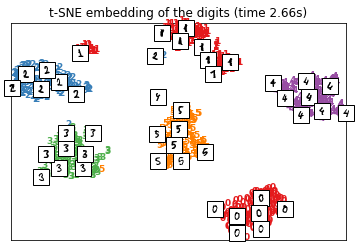

In [4]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

In [5]:
import glob, csv, sys, math
import numpy as np
from scipy.interpolate import interp1d
files=glob.glob('data/*.csv')
files=files+glob.glob('data/*.txt')
print(files)
def listmean(listin):
    return sum(listin)/len(listin)
    

['data/4096lina11gen_data.csv', 'data/4096Claire103659gen_data.csv', 'data/claire_035[NF=50Hz]0-32assembled.csv', 'data/Lina_channel22_11n1.csv']


In [6]:
import numpy as np
#some outout from Qub doesn't use 0 1 IDL convention!
def convertIDL(idl:list) -> list:
    '''This only works assuming more than 0.5 between states!'''
    idl=np.asarray(idl)
    mini=np.min(np.round(idl))
    idl=idl-mini
    maxi=np.max(np.round(idl))
    return np.round((idl/maxi)).tolist()

def shape(lister:list)->tuple:
    return np.asarray(lister).shape


In [7]:
#THIS VERSION MUST HAVE IDEALISED BUT MAY NOT HAVE TIME ie 2 or 3 columns
seq=512
def dofile(newfile):
    print(newfile)
    i=0
    j=0
    firstline=True
    x=[]
    y=[]
    newx=[]
    newy=[]
    with open(newfile) as infile:
        correctidl=False
        reader = csv.reader(infile)
        
        for row in reader:
            columns=len(row)
            i += 1
            if firstline==True:
                # Don't read first line in case header exists
                firstline=False
                continue
            else:
                # Add current and channels to respective lists
                if columns>2:
                    #Must have time, so x is row [1]
                    try:
                        newx.append(float(row[1]))    
                    except:
                        print("An exception occurred",print(row[1]))
                        break
                else:
                    #So presumably no time column, x is row[0]
                    try:
                        newx.append(float(row[0]))    
                    except:
                        print("An exception occurred",print(row[0]))
                        break                        
                if columns>2:
                    #there is a time column so idl is in column 2
                    newy.append(float(row[2]))
                else:
                    #There is no time column so idl is col 1.
                    newy.append(float(row[1]))
            if i % 1000 == 0:
                # Progress update every 100 iterations
                print(f'Progress row: {i}', end='\r')
                sys.stdout.flush()
                print
        x.extend(newx)
        y.extend(newy)
        if max(y)>1:
            y=convertIDL(y)
               
        #make sure y is zero or 1
        miny=min(y)
        maxy=max(y)
        print(f'For x; min={min(x):.2f}, max={max(x):.2f}, mean = {listmean(x):.2f} '+ 
              f'and y;  min={min(y)}, max={max(y)}, xshape={shape(x)}, yshape{shape(y)}')            
        return x,y
    
jumps=seq
def makeImages2c(lx, ly, seq, num, j):
    z = np.ones((2,seq))
    z[0, 0:seq] = lx[j: j+seq]
    z[1, 0:seq] = ly[j: j+seq]
    return z
    
x,y,iclass = [],[],[]
images=[]
for count, filename in enumerate(files):
    newx,newy=dofile(filename)
    print('\nnewx len = \n',np.asarray(newx).shape)
    x.extend(newx)
    y.extend(newy)
    classes=count+1
    print('x shape, y shape',np.asarray(x).shape,np.asarray(y).shape)    
    print('Converting to images...')
    '''Now draw the labels and data out'''
    num=len(newx)
    newimages=[makeImages2c(newx, newy, seq, num, j) for j in range(0, num-seq, jumps)]
    images.extend(newimages)
    print(f"{count} images.shape",np.asarray(newimages).shape)
    iclass.append(np.asarray(newimages).shape[0])

images=np.asarray(images).tolist()
print("FInAL images.shape",np.asarray(images).shape)        
print(f'shape of x {np.asarray(x).shape}')
print(f'shape of y {np.asarray(y).shape}')
num=len(x)
print(f'there are {classes} classes')
print(f"iclass={iclass}")

data/4096lina11gen_data.csv
For x; min=-2.07, max=25.47, mean = 10.88 and y;  min=0.0, max=1.0, xshape=(409599,), yshape(409599,)

newx len = 
 (409599,)
x shape, y shape (409599,) (409599,)
Converting to images...
0 images.shape (799, 2, 512)
data/4096Claire103659gen_data.csv
For x; min=-5.48, max=18.87, mean = 10.87 and y;  min=0.0, max=1.0, xshape=(753663,), yshape(753663,)

newx len = 
 (753663,)
x shape, y shape (1163262,) (1163262,)
Converting to images...
1 images.shape (1471, 2, 512)
data/claire_035[NF=50Hz]0-32assembled.csv
For x; min=0.75, max=15.76, mean = 10.30 and y;  min=-0.0, max=1.0, xshape=(366587,), yshape(366587,)

newx len = 
 (366587,)
x shape, y shape (1529849,) (1529849,)
Converting to images...
2 images.shape (715, 2, 512)
data/Lina_channel22_11n1.csv
For x; min=-1.00, max=20.01, mean = 9.24 and y;  min=0.0, max=1.0, xshape=(150754,), yshape(150754,)

newx len = 
 (150754,)
x shape, y shape (1680603,) (1680603,)
Converting to images...
3 images.shape (294, 2, 51

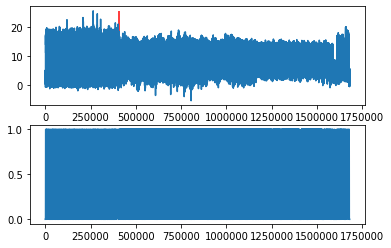

In [8]:
t=range(len(x))
plt.subplot(2,1,1)
plt.plot(t,x)
plt.vlines(seq*iclass[0],0,max(x),"red")

plt.subplot(2,1,2)
plt.plot(t,y)
plt.vlines(seq*iclass[0],0,1,"red")

plt.show()

1.0
plot length = 10000, from 10240
plot length = 10000, from 419328


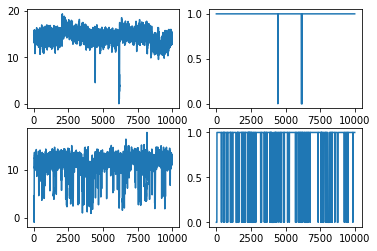

In [9]:
print(max(y))
rec=20
length=10000

start=rec*seq
end= start+length
print (f'plot length = {length}, from {start}')
t=range(length)
plt.subplot(2,2,1)
plt.plot(t,x[start:end])

plt.subplot(2,2,2)
plt.plot(t,y[start:end])

start=rec*seq+(iclass[0]*seq)
end= start+length
print (f'plot length = {length}, from {start}')

plt.subplot(2,2,3)
plt.plot(t,x[start:end])

plt.subplot(2,2,4)
plt.plot(t,y[start:end])

plt.show()

In [10]:
X,Y=[],[]

#Make the funky shape used in the embedding examples
for i, image in enumerate(images):
    a=image[0][:]
    b=image[1][:]
    ab=a
    #print(np.asarray(ab).shape)
    #ab=a #temp just current
    X.append(ab)
print(np.asarray(X).shape)  
#print(y)

(3279, 512)


In [11]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0,verbose=1, 
                     perplexity=30, n_iter=1000, learning_rate=1000,n_iter_without_progress=1000)
t0 = time()
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)
#print(X_tsne[:,0])

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3279 samples in 0.051s...
[t-SNE] Computed neighbors for 3279 samples in 5.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3279
[t-SNE] Computed conditional probabilities for sample 2000 / 3279
[t-SNE] Computed conditional probabilities for sample 3000 / 3279
[t-SNE] Computed conditional probabilities for sample 3279 / 3279
[t-SNE] Mean sigma: 9.517897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.569893
[t-SNE] KL divergence after 1000 iterations: 1.019985
(3279, 2)


In [33]:
# Import Python cycling library
from itertools import cycle
ncol=len(iclass)
colours=[]
sizes=[]
bs=50*ncol+50
colour_codes = map('C{}'.format, cycle(range(ncol)))
for i in range(ncol):
    color=next(colour_codes)
    color=[color]*iclass[i]
    size=[bs-i*50]*iclass[i]
    sizes.extend(size)
    colours.extend(color)
     
print(len(colours))


3279


In [35]:
# Import Python cycling library Do this again, a little differently!
from itertools import cycle
ncol=len(iclass)
colours=[]
sizes=[]
bs=20*len(iclass)+7.5
colour_codes = map('C{}'.format, cycle(range(len(iclass))))
for i in range(len(iclass)):
    colour=next(colour_codes)
    size=[bs-i*15.0]
    sizes.append(size)
    colours.append(colour)
     
print(len(colours))

4


In [37]:
from matplotlib.pyplot import figure

%matplotlib
#figure(figsize=(15, 10), dpi=72)
#plt.scatter(X_tsne[:,0],X_tsne[:,1],c=colours,s=sizes)

fig, ax = plt.subplots()
for n in range(len(iclass)):
    print('class',n)  
    if n==0:
        start=0
    end=sum(iclass[:n+1])
    ax.scatter(X_tsne[start:end,0], X_tsne[start:end,1],c=colours[n],s=sizes[n],label=files[0])
    start=end
ax.legend((files),framealpha=0.75)


Using matplotlib backend: Qt5Agg
class 0
class 1
class 2
class 3


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
import umap
%matplotlib inline

In [15]:
fit = umap.UMAP()
%time u = fit.fit_transform(X)

CPU times: user 29.5 s, sys: 298 ms, total: 29.8 s
Wall time: 10.9 s


In [16]:
# Import Python cycling library Do this again, a little differently!
from itertools import cycle
ncol=len(iclass)
colours=[]
sizes=[]
bs=20*len(iclass)+7.5
colour_codes = map('C{}'.format, cycle(range(len(iclass))))
for i in range(len(iclass)):
    colour=next(colour_codes)
    size=[bs-i*15.0]
    sizes.append(size)
    colours.append(colour)
     
print(len(colours))

4


In [17]:
print(colours)

['C0', 'C1', 'C2', 'C3']


In [18]:
#sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

In [27]:
%matplotlib
figure(figsize=(15, 10), dpi=72)
print(f'X shape{np.asarray(X).shape}')
print("U shape is", u.shape)
print("number in each class",iclass)
sizes=[20.0,20.0,10.0,10.0]
colours=['b','r','g','k']
fig, ax = plt.subplots()
for n in range(len(iclass)):
    print('class',n)  
    if n==0:
        start=0
    end=sum(iclass[:n+1])
    ax.scatter(u[start:end,0], u[start:end,1],c=colours[n],s=sizes[n],label=files[0])
    start=end

ax.legend((files),framealpha=0.75)
#plt.ylim([2,10])
#ax.set_xbound(lower=2, upper=10)
plt.title(f'UMAP embedding {len(iclass)} classes');
annotate=False
if annotate:
    n=range(len(u[:,0]))
    points=[]
    xdist=0.5
    ydist=1
    for i, txt in enumerate(n):
        write=True
        newpoint=np.asarray([u[i,0], u[i,1]])
        offset=np.asarray([u[i,0]+xdist, u[i,1]+ydist])
        if i==0:
            t=ax.annotate(txt, newpoint, fontsize='xx-small', fontweight='extra bold',color='blue',
                         arrowprops=dict(facecolor='black', shrink=0.05), 
                             xytext=offset)
            t.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='black'))
            points.append(offset)
        else:
            for point in points:
                if np.linalg.norm(point - offset)<1:
                    write=False
            if write==True:
                color="blue"
                if i>iclass[0]:
                    color="red"
                t=ax.annotate(txt, newpoint,fontsize='xx-small', fontweight='extra bold',
                             arrowprops=dict(facecolor='black', shrink=0.05), 
                             xytext=offset,annotation_clip=None,color=color )
                t.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='black'))
                points.append(offset)


Using matplotlib backend: Qt5Agg
X shape(3279, 512)
U shape is (3279, 2)
number in each class [799, 1471, 715, 294]
class 0
class 1
class 2
class 3


X shape(3279, 512)
U shape is (3279, 2)
number in each class [799, 1471, 715, 294]


<Figure size 2160x1440 with 0 Axes>

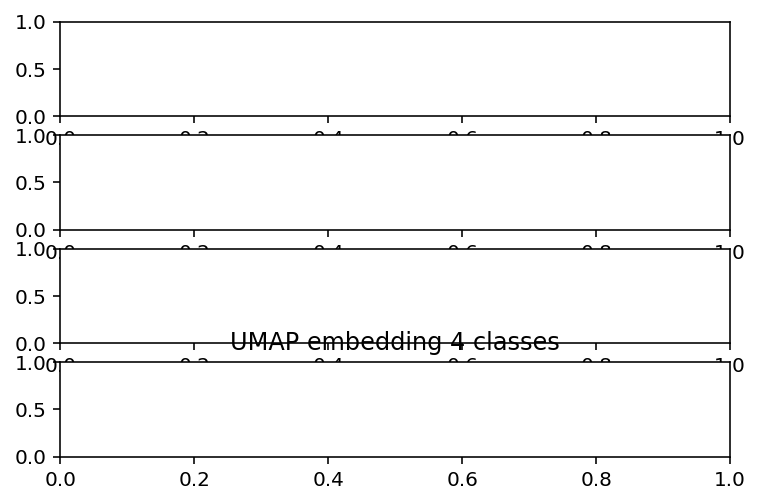

In [20]:
from matplotlib import colors
figure(figsize=(15, 10), dpi=72)
print(f'X shape{np.asarray(X).shape}')
print("U shape is", u.shape)
print("number in each class",iclass)
sizes=[100,80,60,40]
colours=['b','r','g','k']
fig, ax = plt.subplots()
for n in range(len(iclass)):
    plt.subplot(4,1,n+1)
    ax.scatter(u[:iclass[n],0], u[:iclass[n],1],c=colours[n],s=sizes[n],label=files[0])

ax.legend((files),framealpha=0.25)
#plt.ylim([2,10])
#ax.set_xbound(lower=2, upper=10)
plt.title(f'UMAP embedding {len(iclass)} classes');

(3279, 2)
(434, 2)


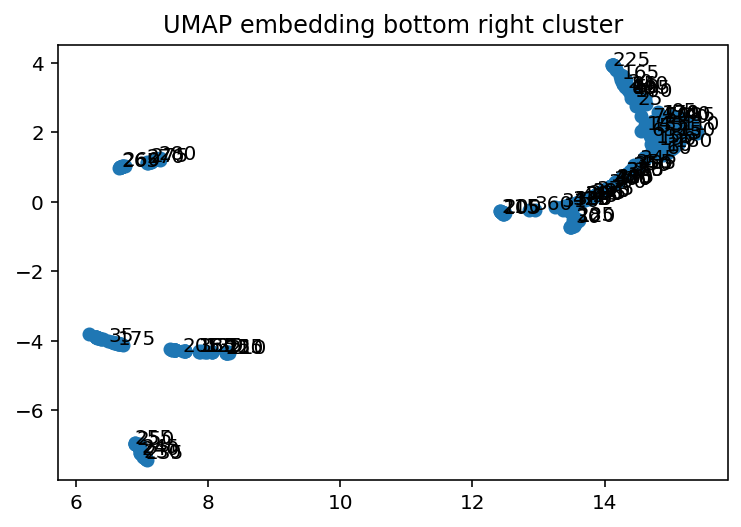

In [21]:
#Get the bottom left cluster that seemed off?
us=u[(u[:,0]>5) & (u[:,1]<6 )] 
print(u.shape)
print(us.shape)

fig, ax = plt.subplots()
ax.scatter(us[:,0], us[:,1])
plt.title(f'UMAP embedding bottom right cluster');
n=range(len(us[:,0]))
for i, txt in enumerate(n):
    if i%5==0:
        ax.annotate(txt, (us[i,0], us[i,1]))


<class 'numpy.ndarray'>
(1, 434)
<class 'numpy.ndarray'>
(434,)


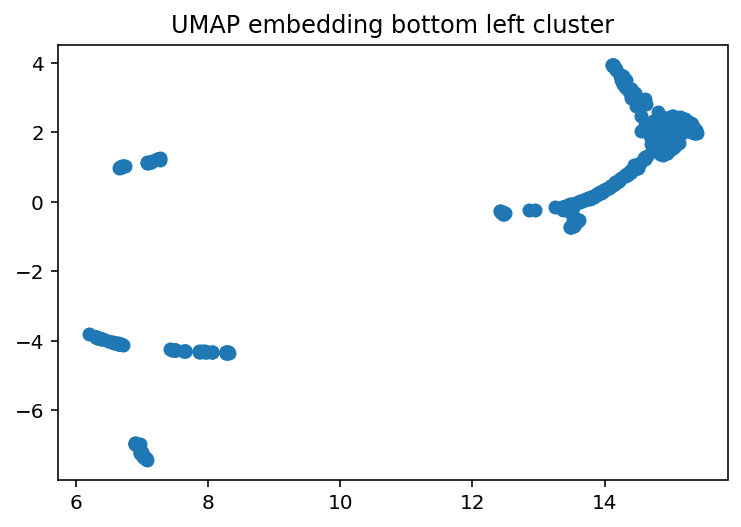

In [22]:
#But we need to know which original data segments this actually is!!
cluster=np.asarray(np.where((u[:,0]>5) & (u[:,1]<6)))
print(type(cluster))
print(cluster.shape)
cluster=cluster[0,:]
print(type(cluster))
print(cluster.shape)
#Now verifying we've the right one!
usx=[]
usy=[]
for el in cluster:
    usx.append(u[el,0])
    usy.append(u[el,1])
fig, ax = plt.subplots()
ax.scatter(usx, usy)
plt.title(f'UMAP embedding bottom left cluster');    


In [23]:
print(cluster)

[   0    1    2   11   17   41   42   47   48   49   50   51   52   57
   58   59   66   67   68   69   72   73   74   80   81   90   91   96
   97   98  107  108  112  113  114  115  120  128  129  134  135  136
  137  138  144  145  146  147  154  155  168  169  170  176  177  180
  181  184  185  186  187  188  195  196  197  203  204  205  206  210
  217  218  219  221  225  226  227  228  232  233  248  249  250  251
  256  264  267  268  283  293  294  298  299  304  305  307  313  320
  321  322  328  329  336  337  338  344  352  353  354  360  361  369
  385  389  396  397  405  406  408  409  423  428  429  441  442  446
  457  458  464  465  466  472  480  481  482  489  492  505  506  507
  512  515  516  525  528  537  538  540  544  552  553  554  555  568
  576  577  578  579  580  595  596  601  602  608  609  616  617  624
  625  626  627  628  629  632  633  636  639  640  641  642  643  644
  648  649  650  651  652  653  664  665  666  667  673  674  675  680
  681 

512
1024
5632
8704
20992
21504
24064
24576
25088
25600


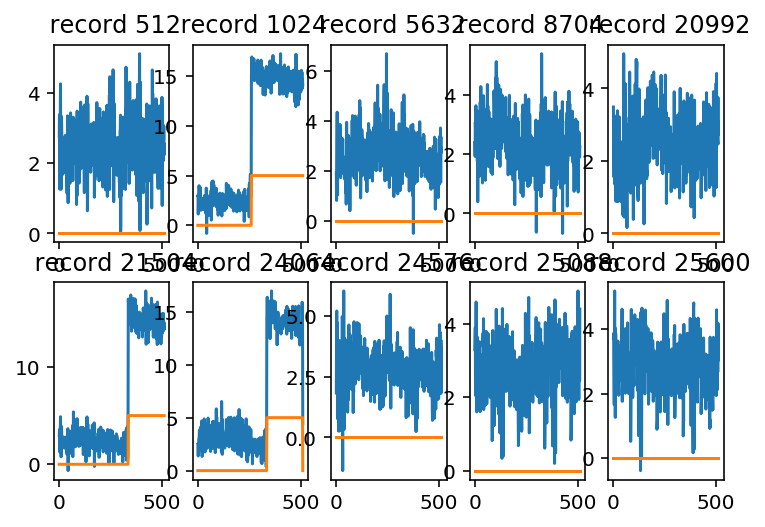

In [24]:
#Now look at the offending records
records=10
for i in range(1,records+1):
    plt.subplot(2,5,i)
    n=int(cluster[i])*seq
    print(n)
    plt.plot(x[n:n+seq])
    plt.plot([val*5 for val in y[n:n+seq]])
    plt.title(f" record {n}")


In [25]:
for i in range (len(classes)):
    print(files[i],classes[i])
    if i ==0:
        j=0
        ax = plt.subplot(111)
        ax.scatter(u[j:j+classes[i],0],u[j:j+classes[i],1],c=colors[i],s=20)
    else:
        print(j,j+classes[i])
        j=sum(classes[:i-1])
        e=sum(classes[:i])
        ax = plt.subplot(111)
        ax.scatter(u[j:e,0],u[j:e,1],c=colors[i],s=20)                    
    #plots.append(p)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(bbox_to_anchor=(50, 1.5))
plt.legend(files,scatterpoints=1,bbox_to_anchor=(1.1, 1.05))


TypeError: object of type 'int' has no len()

In [ ]:
plt.scatter(u[:,0], u[:,1])
plt.title('UMAP embedding of random colours');